In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= "2016-08-23").\
                    filter(Measurement.date <= "2017-8-23").all()

In [12]:
precipitation_data_df = pd.DataFrame(precipitation_data)

In [13]:
# precipitation_data_df.head()

In [14]:
precipitation_data_df["date"] = pd.to_datetime(precipitation_data_df["date"])

In [15]:
prcp_df = precipitation_data_df.set_index("date")

In [16]:
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


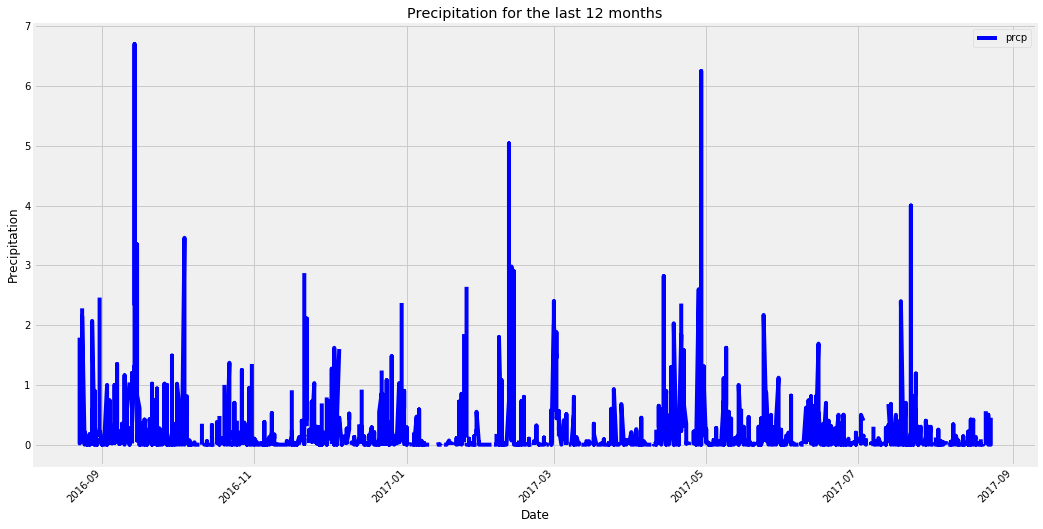

In [17]:
#Plotting the data with Matplotlib
precipitation_plot = prcp_df.plot(figsize = (16, 9),sort_columns=True, rot=45,\
                                  use_index=True, legend=True, grid=True, color='b')

plt.ylabel('Precipitation')
plt.xlabel('Date')
plt.title("Precipitation for the last 12 months")
plt.show()

In [18]:
# calcualting the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Using a query to show how many stations are available in this dataset
session.query(Station.id).count()

9

In [20]:
#  The most active stations (i.e. stations have the most rows)?
# Listing the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
                        filter(Measurement.station == Station.station).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.tobs).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# Station USC00519281 has the most temp. observation 

temp_observations = session.query(func.min(Measurement.tobs),\
                                  func.max(Measurement.tobs),\
                                  func.avg(Measurement.tobs)).\
                    filter(Measurement.station == "USC00519281",\
                           Measurement.station == Station.station).all()
temp_observations

[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


year_temp_observations = session.query(Measurement.tobs).\
                        filter(Measurement.station == "USC00519281", Measurement.station == Station.station,\
                               Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").all()

In [23]:
temperatures = [temp[0] for temp in year_temp_observations]


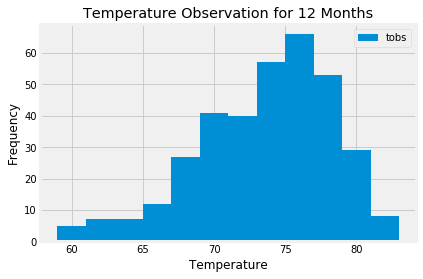

In [24]:
plt.hist(temperatures, bins=12)
plt.title("Temperature Observation for 12 Months")
plt.ylabel('Frequency')
plt.xlabel('Temperature')
labels = ['tobs']
plt.legend(labels)

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs),\
                         func.avg(Measurement.tobs),\
                         func.max(Measurement.tobs)).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [26]:
calc_temps('2012-02-28', '2012-03-05')

[(62.0, 69.57142857142857, 74.0)]

In [27]:
def plot_tepm(start_date, end_date):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start_date, Measurement.date<=end_date).all()
    temperatures = [temp[0] for temp in query]
    avg_temp = np.mean(temperatures)
    lowest_temp = min(temperatures)
    highest_temp = max(temperatures)
    
    plt.figure(figsize=(3,10))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='salmon', alpha= 0.7)
    plt.ylabel("Tempe (F)")
    plt.title("Trip Avg. Temperature")
    plt.show()


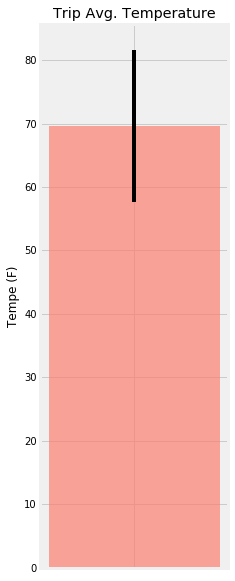

In [28]:
plot_tepm('2012-02-28', '2012-03-05')

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

